## Tarea 15


In [47]:
using Plots

  likely near /Users/jonathanlozano/.julia/v0.6/Plots/src/series.jl:91
  likely near /Users/jonathanlozano/.julia/v0.6/Plots/src/series.jl:91


In [62]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas

using SymPy

export NewtonSympy

"""Método de Newton para funciones f(x) , El método tiene 3 argumentos el primero es una función f(x),xo es una condicion inicial o un arreglo de condiciones iniciales par evaluar la función usando NewtonSympy., y tolerancia es el error permitido para el método."""

function NewtonSympy(f,xo,tolerancia) #Esta funcion admite una condicion inicial o un intervalo de donde toma las condiciones iniciales
Xk=[]
ERROR=[]
x=Sym("x")
df=lambdify(diff(f(x),x))
   while abs(f(xo))>tolerancia
        xo=xo-f(xo)/df(xo)
        push!(Xk,xo)
    end    
    xo
end

export IntegracionTrapecio
 """Método de integración del trapecio en un intevalo (a,b), el método admite una función f(x), los argumentos a y b son el punto inicial y final del intervalo mientras que n nos dice en cuantas partes se va a dividir el intervalo.""" 
function IntegracionTrapecio(f,a,b,n)
h=(b-a)/n
IT=h*(f(a)+f(b))/2   
    for i in 1:n
      IT=IT+f(a+((b-a)*i/n))*h
    end
    IT
end

export IntegracionSimpson
"""Método de integración de Simpson a segundo orden en un intevalo (a,b),el método admite una función f(x), los argumentos a y b son el punto inicial y final del intervalo mientras que n nos dice en cuantas partes se va a dividir el intervalo. """
function IntegracionSimpson(f,a,b,n)
h=(b-a)/n
P=linspace(a,b,n+1)    
#IS=(h/3)*(f(a)+f(b))
s=convert(Int64,n/2) #necesitamos que n/2 sea detectado como entero para que el indice i pueda correr en 1:n/2   
IS=0    
    for i in 1:s
        IS=IS+(f(P[2i-1])+4f(P[2i])+f(P[2i+1]))*(h/3)
    end
    IS
end 
export IntegracionRiemann
"""Método de integración de Riemann en un intevalo (a,b),el método admite una función f(x), los argumentos a y b son el punto inicial y final del intervalo mientras que n nos dice en cuantas partes se va a dividir el intervalo. """
function IntegracionRiemann(f,a,b,n)
xk=linspace(a,b,n)
IR=0
s=convert(Int64,n-1)    
    for i in 1:s
        IR=IR+f(xk[i+1])*(xk[i+1]-xk[i])
    end
    IR
end

export InterpolacionLagrange
""" Método de interpolación de Lagrange el método admite dos arreglos Xk y Yk correspondientes a coordenadas (x,y) por lo tanto deben ser de la misma dimension."""
x=Sym("x")#Usaré esta paquetería para corroborar que los productos que estoy programando sean los que quiero y que el programa nos arroje el polinomio

function Lj(Xk,j)
lj=1
m=1
XkL=[]
    for i in 1:length(Xk)
        
    if Xk[i]!=Xk[j]
        push!(XkL,Xk[i])
        end
        end  #Este pequeño bucle para generar los XkL sirve para eliminar el punto Xk[j] de la lista y no tener una indeterminación
        
   while m-1<length(XkL)  #Este ciclo while es el que calcula de verdad los valores de cada lj que es un producto en serie
        lj=lj*((x-XkL[m])/(Xk[j]-XkL[m]))
        m=m+1
    end
    lj
end

function InterpolacionLagrange(Xk,Yk)
L=0
    for j in 1:length(Yk)
        L=L+Yk[j]*Lj(Xk,j)
    end
    simplify(L)
end

export derivada_orden

""" Derivada numérica con error de orden h^n. El método admite una funcion f(x), un punto x donde se calcula la derivada, una diferencia h con la que se aproxima la derivada, y orden es el orden de error del método como potencia de h."""
function coeficiente_taylor_asinh(i)
x=Sym("x");
h=Sym("h");
N(subs(diff(asinh(x/2),x,i)/factorial(Float64(i)),x=>0))
end

function diferencia_finita_simetrica(f)
    return (x,h)->f(x+h,h)-f(x-h,h)
end

function derivada_orden(f,x,h,orden)
    F(x,h)=f(x)
    df=0
    for i in 1:orden
        F=diferencia_finita_simetrica(F)
        df=df+coeficiente_taylor_asinh(i)*F(x,h)
    end
    return df/h
end

export MetodoEuler

""" Método de Euler idependiente de la dimensión para resolver una ecuación diferencial en un intervalo (to,t). El método admite una función f o un arreglo de funciones, y un arreglo de condiciones inicial, por último h es el paso del método. 
Como resultado se tiene un arreglo con dos entradas, la primera entrada es el arreglo de valores de t, la segunda entra es un arreglo con arreglos cada uno con el valor de cada paso dado para cada variable"""

function MetodoEuler(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    listt=to:h:t
    listx=[xo]
    x=xo
    for i in 1:length(listt)-1
    x=x+h*f(x,listt[i])
        push!(listx,x)
    end
    return listt,listx
end

export MetodoEuler_implicito
""" Método de Euler idependiente para resolver una ecuación diferencial en un intervalo (to,t). El método admite una función f, y una condicion inicial xo, por último h es el paso del método. 
Como resultado se tiene un arreglo con dos entradas, la primera entrada es el arreglo de valores de t, la segunda entra es un arreglo con los valores de x"""

function NewtonSympyE(f,xo,t) #Esta funcion admite una condicion inicial o un intervalo de donde toma las condiciones iniciales
Xk=[]
df(y,t)=N(diff(f(x,t),x))
    while abs(f(xo,t))>1e-6
        xo=xo-f(xo,t)/df(xo,t)
        push!(Xk,xo)
    end    
    xo
end

function MetodoEuler_implicito(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
   
    listt=to:h:t
    listx=[xo]
    for i in 1:length(listt)-1
        
    g(x,s)=x-h*f(x,listt[i])-xo #aqui definimos la función de la cual obtendremos la raiz usando el método de Newton 
    xo=xo+h*f(NewtonSympyE(g,Float64(xo),listt[i]),listt[i+1]) #aqui estamos aplicando el método de Newton con las raices encontradas con Newton
       
        push!(listx,xo)
    end
    return listt,listx
end

export RungeKutta4th
""" Método de Runge Kutta a cuarto orden. El método puede recibir un arreglo de funciones f, un arreglo de condiciones iniciales xo, un punto inicial y final to y t correspondientemente y un paso h.
Como resultado se tiene un arreglo con dos entradas, la primera entrada es el arreglo de valores de t, la segunda entra es un arreglo con arreglos cada uno con el valor de cada paso dado para cada variable"""

function RungeKutta4th(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    x=xo
    listt=to:h:t
    listx=[xo]
    for i in 1:length(listt)-1
        
    k1=f(x,listt[i])
    k2=f(x+(h/2)*k1,listt[i]+h/2) 
    k3=f(x+(h/2)*k2,listt[i]+h/2) 
    k4=f(x+h*k3,listt[i]+h)
        
    x=x+(h/6)*(k1+2k2+2k3+k4)
        
        push!(listx,x)    
    end
    return listt,listx
end

end

herramientas

## Método de Newton, usando la derivada de Sympy. (La raíz cerca de 1 es pi/2)

In [42]:
f(x)=cos(x)
g(x)=sin(x)
herramientas.NewtonSympy(f,1,1e-7)

1.5707963267954879

## Integración numérica con el método del trapecio. (La integral exacta de cos de 0 a 2pi es 0)

In [20]:
herramientas.IntegracionTrapecio(f,0,2pi,1e6) 

6.28318530688232e-6

## Integración numérica con el método de Simpson a segundo orden. (La integral exacta de cos de 0 a 2$\pi$ es 0)

In [21]:
herramientas.IntegracionSimpson(f,0,2pi,1e6)

-3.2747140773798505e-16

## Integración numérica con el método de Riemann (La integral exacta de cos de 0 a 2pi es 0)

In [22]:
herramientas.IntegracionRiemann(f,0,2pi,1e6)

2.5132518712922634e-14

## Derivada numérica de con error de orden $h^n$ (La derivada exacta de g=sin(x) en 0 es 1)

In [46]:
herramientas.derivada_orden(g,0,0.01,10) 

0.9999999999999998

## Método de Interpolación de Lagrange, dado un conjunto de puntos (x,y)

  likely near In[49]:5
  likely near In[49]:5
  likely near In[49]:5
in jprint at /Users/jonathanlozano/.julia/v0.6/SymPy/src/display.jl



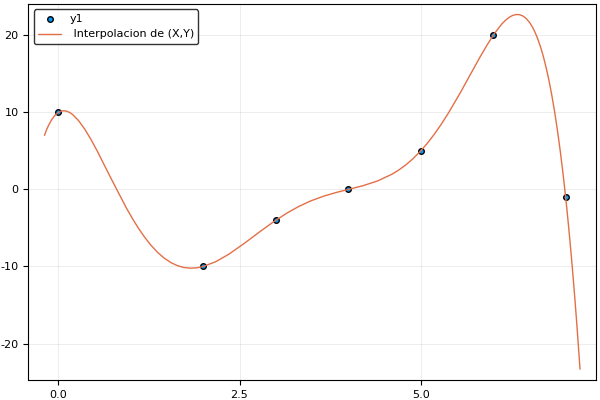

In [49]:
X=[0,2,3,4,5,6,7] 
Y=[10,-10,-4,0,5,20,-1]
scatter(X,Y)
plot!(herramientas.InterpolacionLagrange(X,Y),label=" Interpolacion de (X,Y)")



## Método de Euler implícito


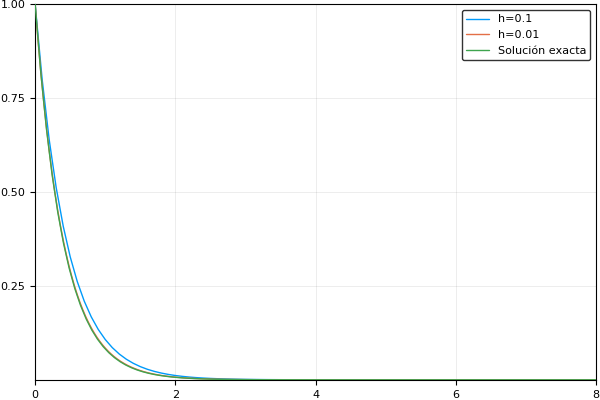

In [66]:
f(x,t)=-2.5x
h1=herramientas.MetodoEuler_implicito(f,1.0,0.0,8.0,0.1)
h2=herramientas.MetodoEuler_implicito(f,1.0,0.0,8.0,0.01)
plot(h1,label="h=0.1")
plot!(h2,label="h=0.01")
hExacta(t)=e^(-2.5*t)
plot!(linspace(0,8,100),hExacta,label="Solución exacta")

## Método de Euler explícito (Se resolvió $\frac{d^2x}{dt^2}+x=0$)


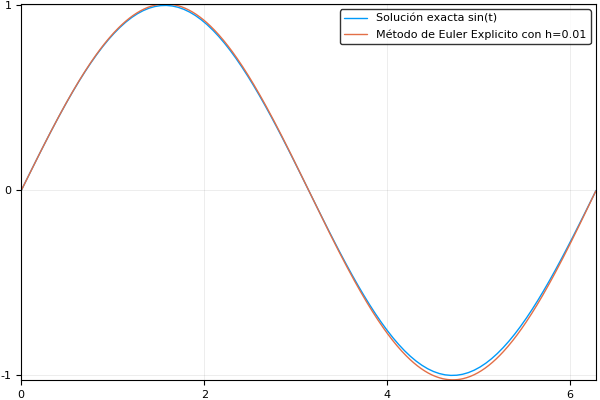

In [76]:
f(x,t)=[x[2],-x[1]]
exacta(t)=sin(t)
γ=herramientas.MetodoEuler(f,[0.0,1.0],0.0,2*pi,0.01)
y1=[]
y2=[]
τ=γ[1]
for i in 1:length(γ[2])
push!(y1,γ[2][i][1])
push!(y2,γ[2][i][2])   
end
plot(linspace(0,2*pi,100),exacta,label="Solución exacta sin(t)")
plot!(τ,y1,label="Método de Euler Explicito con h=0.01")

## Método de Runge Kutta a cuarto orden (Se resolvió $\frac{d^2x}{dt^2}+x=0$, se graficó la solución y las enrgías del sistema físico)


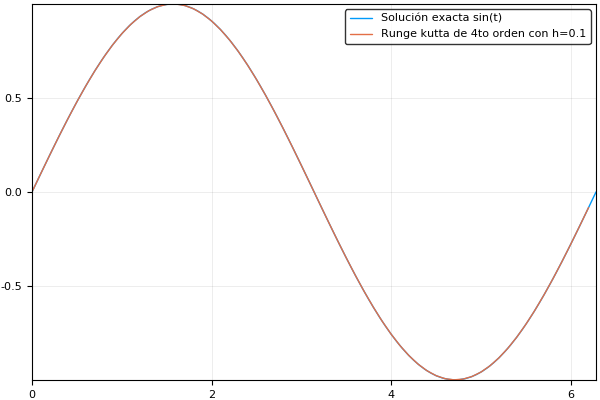

In [80]:
σ=herramientas.RungeKutta4th(f,[0.0,1.0],0.0,2*pi,0.1);
x1=[]
x2=[]
τ=σ[1]
for i in 1:length(σ[2])
push!(x1,σ[2][i][1])
push!(x2,σ[2][i][2])   
end
plot(linspace(0,2*pi,100),exacta,label="Solución exacta sin(t)")
plot!(τ,x1,label="Runge kutta de 4to orden con h=0.1")


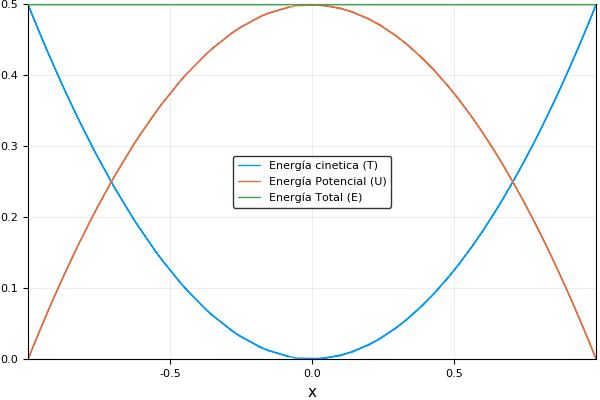

In [81]:
plot(x1,0.5x1.^2,xlabel="x",label="Energía cinetica (T)")
plot!(x1,0.5x2.^2,label="Energía Potencial (U)")
plot!(x1,0.5x1.^2+0.5x2.^2,label="Energía Total (E)")